In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error,mean_absolute_error

In [ ]:
df = pd.read_csv('/content/station_data_dataverse3.csv')

In [ ]:
label_encoder = LabelEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'])
df['platform'] = label_encoder.fit_transform(df['platform'])

In [ ]:
# features = [
#     'chargeTimeHrs', 'startTime', 'endTime',
#     'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
#      'userId', 'stationId', 'locationId'
# ]
features= ['chargeTimeHrs','startTime', 'endTime','weekday','distance','managerVehicle','facilityType'
    ,'userId', 'stationId', 'locationId']

X = df[features]
y = df['kwhTotal']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
base_estimator = DecisionTreeRegressor(random_state=0)
bagging_model = BaggingRegressor(estimator=base_estimator, n_estimators=300, random_state=0)


In [ ]:
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0),
                 n_estimators=300, random_state=0)

In [ ]:
y_pred = bagging_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("RMSE:", rmse)
mape=mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)
print("R² Score:", r2)
print(mean_absolute_error(y_test, y_pred))

RMSE: 1.4043737363454685
MAPE: 5803386677410.853
R² Score: 0.79430003159778
0.8848787432498768


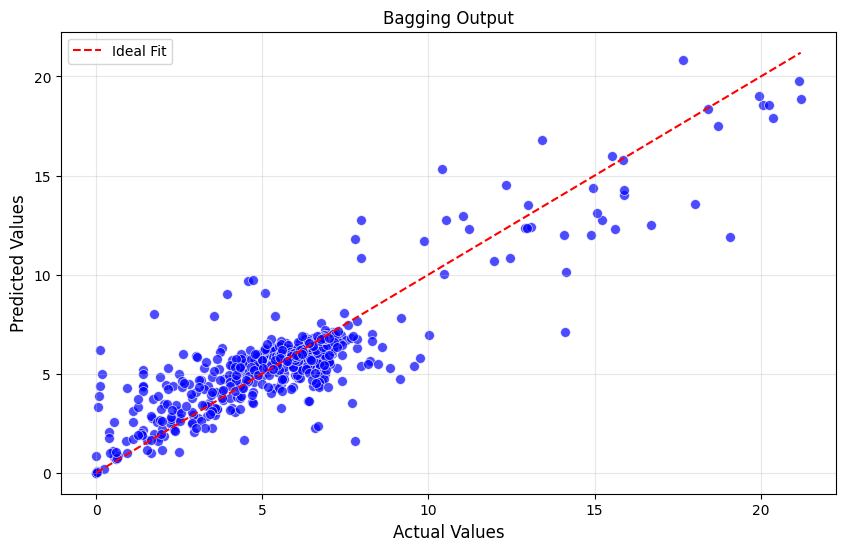

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='blue', s=50, alpha=0.7)
sns.lineplot(x='Actual', y='Actual', data=results_df, color='red', linestyle='--', label="Ideal Fit")
plt.title("Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Bagging Output")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

RANDOM FOREST BAGGING

In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=0)
rf_model.fit(X_train, y_train)

# Predictions
y_predRF = rf_model.predict(X_test)

# Evaluate the model
mseRF = mean_squared_error(y_test, y_predRF)
r2RF = r2_score(y_test, y_predRF)
mape=mean_absolute_percentage_error(y_test, y_predRF)
print("MAPE:", mape)

print(f"Mean Squared Error: {mseRF:.2f}")
print(f"R² Score: {r2RF:.2f}")
print(mean_absolute_error(y_test, y_predRF))

MAPE: 5380176544533.462
Mean Squared Error: 1.96
R² Score: 0.80
0.8818567157584654


GRAPHS

<Figure size 800x800 with 0 Axes>

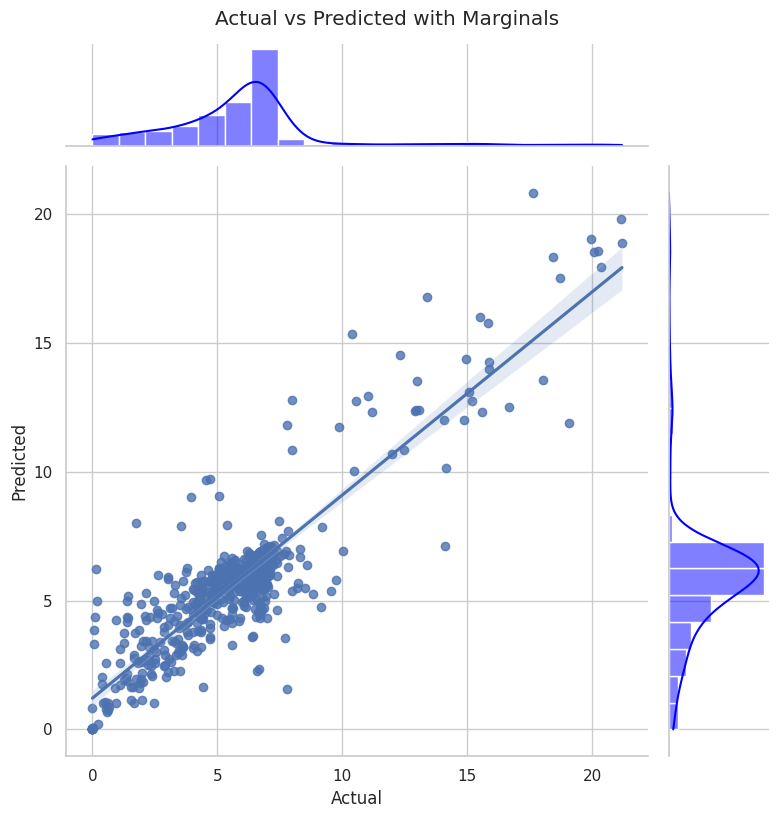

<ipython-input-14-46a3946e32b1>:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = results_df.pivot_table(


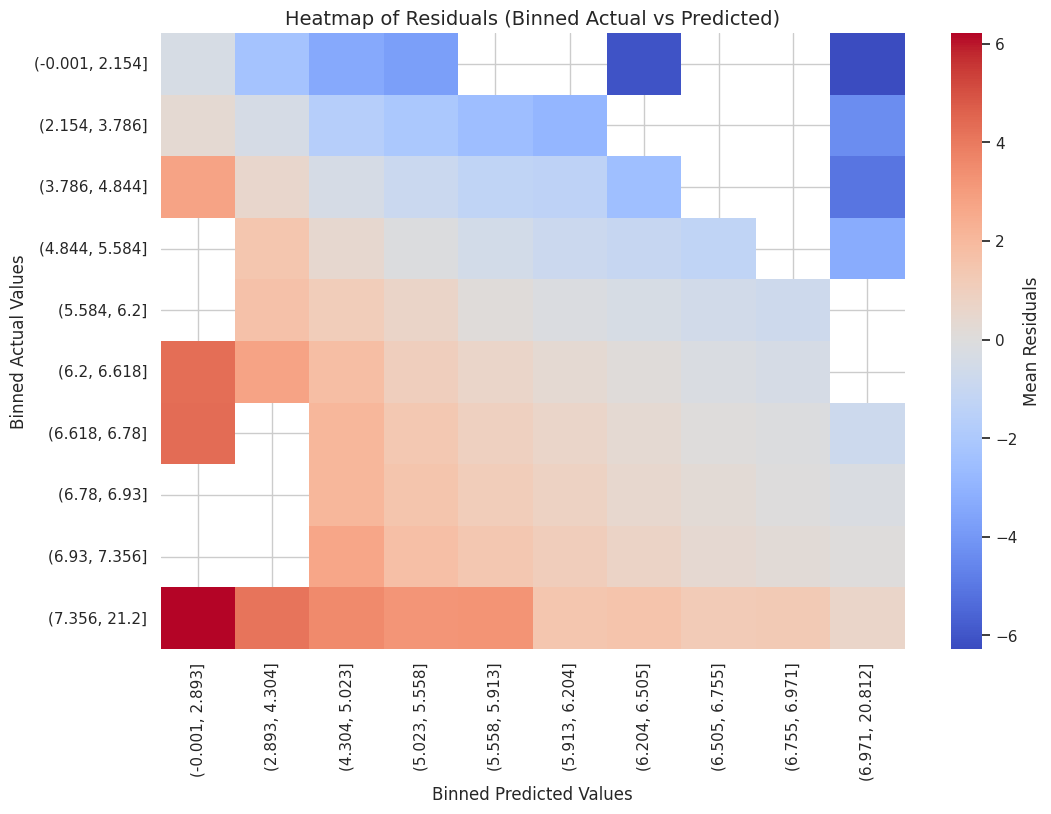

Mean Squared Error (MSE): 1.9722655913369311
R² Score: 0.79430003159778


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# 1. Joint Plot: Actual vs Predicted
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
joint_plot = sns.jointplot(
    data=results_df,
    x="Actual",
    y="Predicted",
    kind="reg",  # Regression line
    height=8,
    ratio=5,
    marginal_kws={'bins': 20, 'fill': True, 'color': 'blue'}
)
joint_plot.fig.suptitle("Actual vs Predicted with Marginals", y=1.02)
plt.show()

# 2. Heatmap of Residuals (Binned Residuals)
residuals = y_test - y_pred
results_df['Residuals'] = residuals

# Bin residuals for heatmap
results_df['Residual_Bin'] = pd.cut(results_df['Residuals'], bins=20)

# Heatmap: Actual vs Predicted with Residual Bins
pivot_table = results_df.pivot_table(
    values="Residuals",
    index=pd.qcut(results_df["Actual"], q=10),
    columns=pd.qcut(results_df["Predicted"], q=10),
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", cbar_kws={'label': 'Mean Residuals'})
plt.title("Heatmap of Residuals (Binned Actual vs Predicted)", fontsize=14)
plt.xlabel("Binned Predicted Values", fontsize=12)
plt.ylabel("Binned Actual Values", fontsize=12)
plt.show()

# 3. Metrics: Print Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

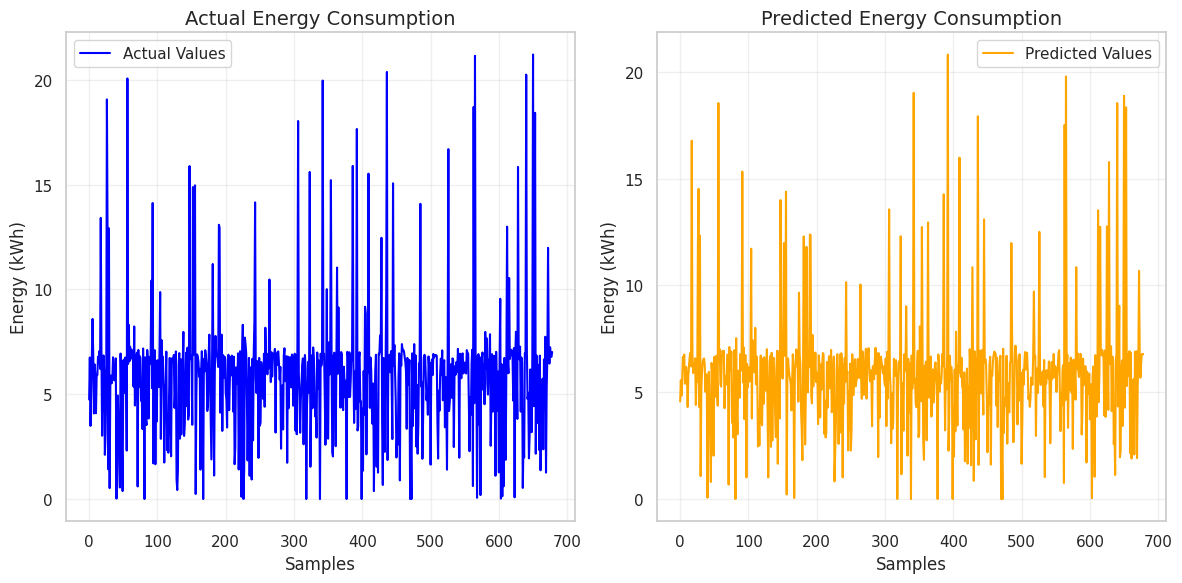

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'y_test' (actual values) and 'y_pred' (predicted values) are available
# Create a DataFrame for results
results_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

# Plot Actual values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df['Actual'], color='blue', label='Actual Values')
plt.title("Actual Energy Consumption", fontsize=14)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Plot Predicted values
plt.subplot(1, 2, 2)
plt.plot(results_df['Predicted'], color='orange', label='Predicted Values')
plt.title("Predicted Energy Consumption", fontsize=14)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


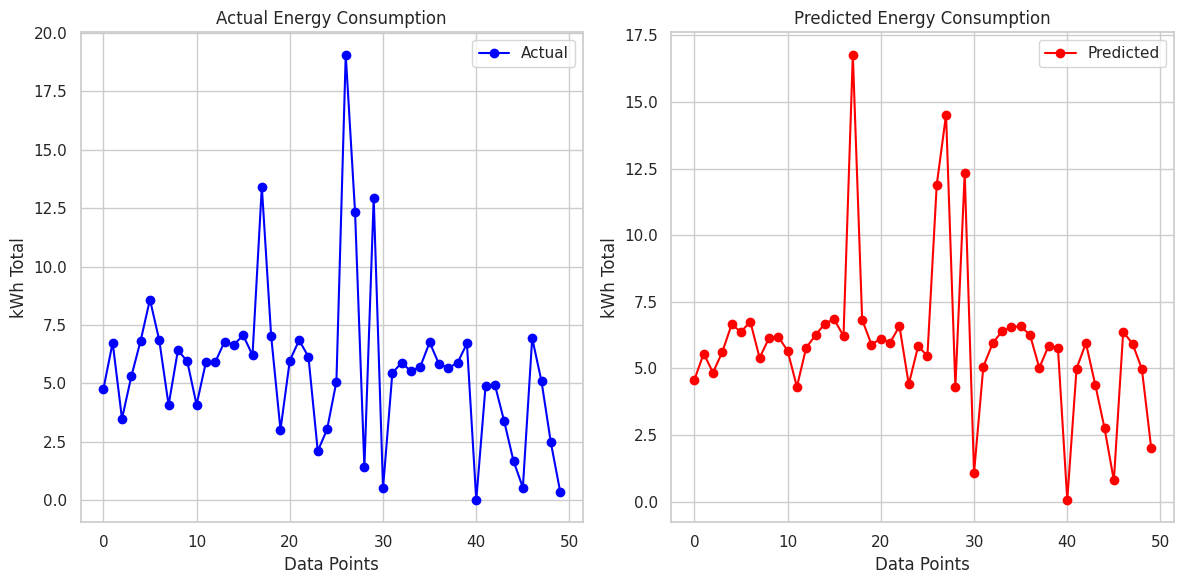

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted graphs separately
plt.figure(figsize=(12, 6))

# Plot Actual values
plt.subplot(1, 2, 1)
plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")
plt.title("Actual Energy Consumption")
plt.xlabel("Data Points")
plt.ylabel("kWh Total")
plt.legend()
plt.grid(True)

# Plot Predicted values
plt.subplot(1, 2, 2)
plt.plot(y_pred[:50], label="Predicted", color="red", marker="o", linestyle="-")
plt.title("Predicted Energy Consumption")
plt.xlabel("Data Points")
plt.ylabel("kWh Total")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


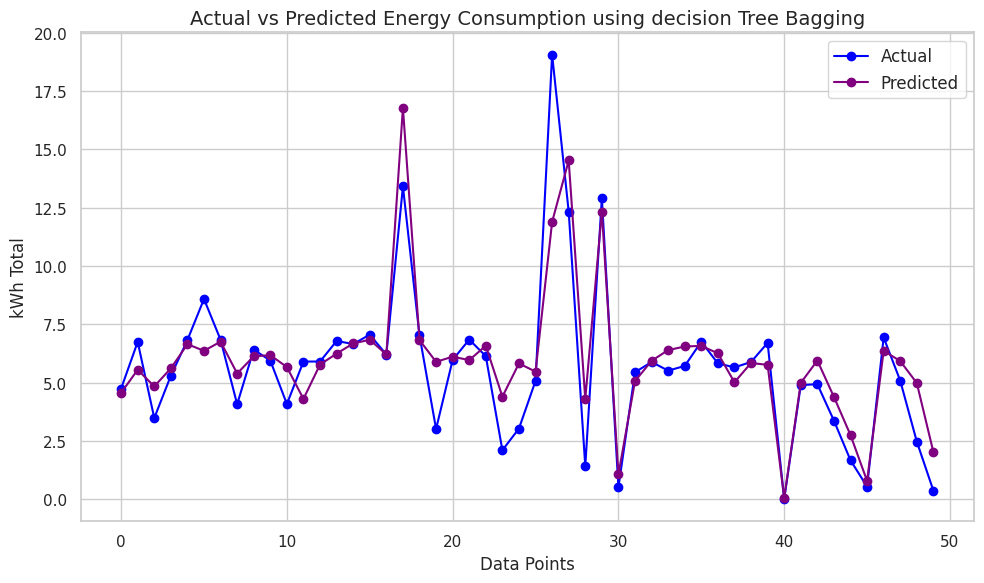

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")


plt.plot(y_pred[:50], label="Predicted", color="purple", marker="o", linestyle="-")

plt.title("Actual vs Predicted Energy Consumption using decision Tree Bagging", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)


plt.legend(fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()


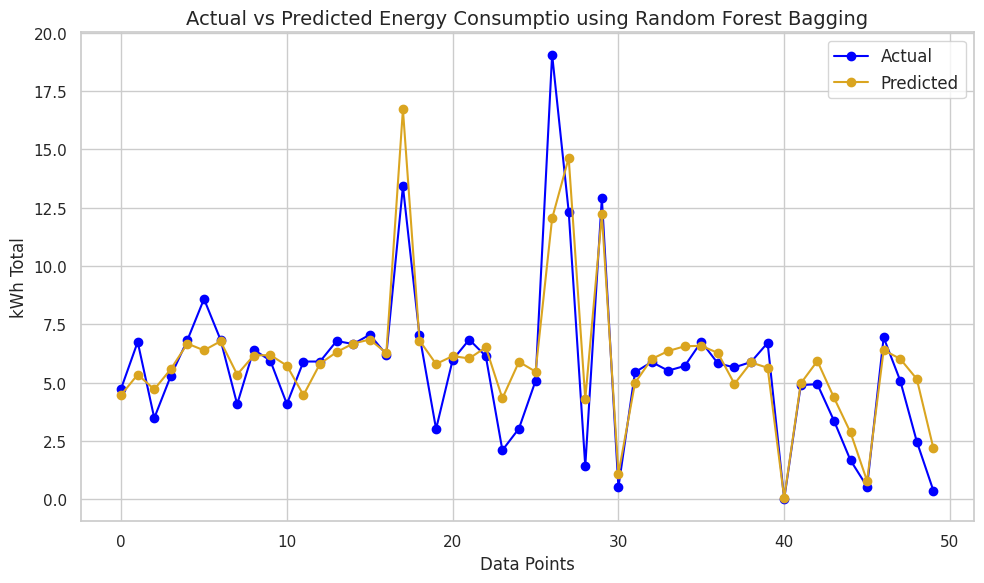

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted on the same graph
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")

# Plot predicted values
plt.plot(y_predRF[:50], label="Predicted", color="goldenrod", marker="o", linestyle="-")

# Add title and labels
plt.title("Actual vs Predicted Energy Consumptio using Random Forest Bagging", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
